<a href="https://colab.research.google.com/github/NetoRibeiro/DATA8001Assignment1/blob/main/Linear_Regression_Model_01042021_008_ToFit_RStudio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import and Load File

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import pandas as pd
from datetime import datetime as dt

import calendar
import re
import string

import math
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

from scipy import stats

In [17]:
df_processed = pd.read_csv('/content/drive/MyDrive/Data Science and Analytics/R00206995/data/R00206995_processed.csv')

In [18]:
df_processed.head()

,car_reg,purchase_date,year,month,county,make,model,type,colour,tax_band,price
0,202-C-2315,2020-07-01,2020,7,CORK,AUDI,A4,SALOON,RED,B,55287.0
1,191-C-3750,2019-01-20,2019,1,CORK,MAZDA,CX-30,SUV,SILVER,B,41690.0
2,191-L-3155,2019-03-21,2019,3,LIMERICK,BMW,3 SERIES,SALOON,WHITE,C,40381.0
3,191-D-2645,2019-01-26,2019,1,DUBLIN,AUDI,Q3,SUV,ORANGE,C,44836.0
4,181-W-341,2018-01-27,2018,1,WATERFORD,OPEL,ASTRA,HATCHBACK,RED,A,32188.0


###Transformation and Split

In [19]:
def get_feature_stats(df, list_columns):
    lis_of_string_features = []
    for feature in list_columns:
      if df[feature].dtype not in ['uint8', 'int16','int32','int64','float16','float32','float64']:
        lis_of_string_features.append(feature)
    return lis_of_string_features


def concat_columns(col1, col2, delimited):
  try:
    cols = f'{col1}{delimited}{col2}'
    return cols
  except Exception as ex:
    raise Exception(f'Error when concatenate:: {ex}')


def apply_calc_columns(col1, col2, calc):
  try:
    col1 = float(col1)
    col2 = float(col2)
 
    if calc == 'times':
      cols = col1 * col2
 
    elif calc == 'div':
      try:
        cols == col1 / col2
      except Exception as ex:
        raise Exception(f'Error when try to divide:: {ex}')
        return 0.0
 
    elif calc == 'plus':
      cols = col1 + col2
 
    elif calc == 'minus':
      cols = col1 - col2
 
    else:
      cols = 0

    return cols
  except Exception as ex:
    raise Exception(f'Error when convert to a float:: {ex}')


In [20]:
df_concats = df_processed.copy()

In [21]:
#df_concats['makemodel'] = df_concats.apply(lambda row: concat_columns(row['make'], row['model'],"_"), axis=1)
#df_concats.head(3)

In [23]:
# Create a list of columns to apply Dummies

#list_of_best_features = ['tax_band', 'type', 'make', 'model']

# Apply Lower case before dummies
df_concats['type'] = df_concats['type'].str.lower()
df_concats['tax_band'] = df_concats['tax_band'].str.lower()
df_concats['make'] = df_concats['make'].str.lower()
df_concats['model'] = df_concats['model'].str.lower()
df_tofit = df_concats.copy()

# Apply Dammies
# df_dummies = pd.get_dummies(df_concats, columns=list_of_best_features)
# df_dummies.drop(['car_reg', 'purchase_date', 'month'], axis=1, inplace=True)
df_tofit.drop(['car_reg', 'purchase_date', 'month'], axis=1, inplace=True)
# df_dummies.head(3)

In [31]:
#list_columns = df_dummies.columns
list_columns = df_tofit.columns
list_new_columns = df_tofit.columns
#list_feature = get_feature_stats(df_dummies, list_columns)
list_feature = get_feature_stats(df_tofit, list_columns)
list_new_features = get_feature_stats(df_tofit, list_new_columns)

In [32]:
# df_train, df_test = train_test_split(df_dummies.copy() ,test_size=0.2, random_state=8001)
df_train, df_test = train_test_split(df_tofit.copy() ,test_size=0.2, random_state=8001)

In [33]:
df_tofit.head(3)

,year,county,make,model,type,colour,tax_band,price
0,2020,0,0,5,3,2,1,55287.0
1,2019,0,3,14,4,3,1,41690.0
2,2019,3,1,1,3,4,2,40381.0


In [34]:
#Convert all string features to a int features
for feature in list_feature:
  label_condition = LabelEncoder()
  df_train[feature] = label_condition.fit_transform(df_train[feature])
  df_test[feature] = label_condition.fit_transform(df_test[feature])
  
  

In [35]:
#Convert all string features to a int features
for feature in list_new_features:
  label_condition = LabelEncoder()
  df_tofit[feature] = label_condition.fit_transform(df_tofit[feature])

In [36]:
df_train.shape, df_test.shape

((3040, 8), (760, 8))

In [37]:
df_train['new_car'] = df_train.apply(lambda row: apply_calc_columns(row['make'], row['model'],"plus"), axis=1)
df_test['new_car'] = df_test.apply(lambda row: apply_calc_columns(row['make'], row['model'],"plus"), axis=1)
df_tofit['new_car'] = df_tofit.apply(lambda row: apply_calc_columns(row['make'], row['model'],"plus"), axis=1)

In [38]:
df_train['new_car'] = df_train.apply(lambda row: apply_calc_columns(row['new_car'], row['type'],"times"), axis=1)
df_test['new_car'] = df_test.apply(lambda row: apply_calc_columns(row['new_car'], row['type'],"times"), axis=1)
df_tofit['new_car'] = df_tofit.apply(lambda row: apply_calc_columns(row['new_car'], row['type'],"times"), axis=1)

In [54]:
df_train.drop(['make', 'model', 'type'], axis=1, inplace=True)
df_test.drop(['make', 'model', 'type'], axis=1, inplace=True)
df_tofit.drop(['make', 'model', 'type'], axis=1, inplace=True)

In [55]:
# X variables (independent)
output_feature_dummies = 'price'
input_features_new_fit = [item for item in df_tofit.columns if item not in output_feature_dummies]
print(input_features_new_fit)

['year', 'county', 'colour', 'tax_band', 'new_car']


In [56]:
# X variables (independent)
output_feature_dummies = 'price'
input_features_dummies = [item for item in df_train.columns if item not in output_feature_dummies]
print(input_features_dummies)

['year', 'county', 'colour', 'tax_band', 'new_car']


In [57]:
# Apply Standar Scaler for a list of features
for column in df_tofit.columns:

  if column in input_features_new_fit:
    scaler_column = StandardScaler()
    scaler_column.fit(df_tofit[column].values.reshape(-1, 1))
    df_tofit[column] = scaler_column.transform(df_tofit[column].values.reshape(-1, 1))
      
  else:
    print(f'skip:\t{column}')
df_tofit.to_csv('/content/drive/MyDrive/Data Science and Analytics/R00206995/data/R00206995_tofit.csv', index=False)

skip:	price


In [58]:
#df_dummies.head(3)

In [59]:
# Apply Standar Scaler for a list of features
list_of_features_standard = ['year', 'colour', 'county', 'make-model']
for column in df_train.columns:

  if column in input_features_dummies:
    scaler_column = StandardScaler()
    scaler_column.fit(df_train[column].values.reshape(-1, 1))
    df_train[column] = scaler_column.transform(df_train[column].values.reshape(-1, 1))
    df_test[column] = scaler_column.transform(df_test[column].values.reshape(-1, 1))
    
  
  else:
    print(f'skip:\t{column}')
df_dummies.to_csv('/content/drive/MyDrive/Data Science and Analytics/R00206995/data/R00206995_tofit_dum.csv', index=False)

skip:	price


###Linear Regressor Model
####Standard Scaler plus Best Features Dummies

In [60]:
X_train = df_train[input_features_dummies].values
X_test = df_test[input_features_dummies].values

y_train = df_train[[output_feature_dummies]].values
y_test = df_test[[output_feature_dummies]].values

In [61]:
lr_scaler_model = LinearRegression()
lr_scaler_model.fit(X=X_train, y=y_train)
lr_scaler_model_prodict = lr_scaler_model.predict(X=X_test)
lr_scaler_model_mse = mean_squared_error(y_pred=lr_scaler_model_prodict, y_true=y_test)
lr_scaler_model_r_sq = r2_score(y_pred=lr_scaler_model_prodict, y_true=y_test)

###Valitation Test:: Linear Regressor Model Standard Scaler and Best Features Dummies

In [62]:
print(f'Linear Model StandardScaler Features Accuracy:\nRMSE={math.sqrt(lr_scaler_model_mse):,.0f}\nRSq={lr_scaler_model_r_sq:.2f} or {lr_scaler_model_r_sq*100:.0f}% of the variability in Y can be explained using X')

Linear Model StandardScaler Features Accuracy:
RMSE=22,804
RSq=0.42 or 42% of the variability in Y can be explained using X


In [63]:
lr_scaler_model.coef_

array([[ 1255.14458612,   111.68652055,  -208.38872754, 16850.79663199,
        -3534.12777832]])

In [64]:
lr_scaler_model.score

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

In [65]:
lr_scaler_model.intercept_, lr_scaler_model.rank_

(array([46814.18519737]), 5)

In [66]:
pickle.dump(lr_scaler_model, open('/content/drive/MyDrive/Data Science and Analytics/R00206995/model/model.pkl', 'wb') )

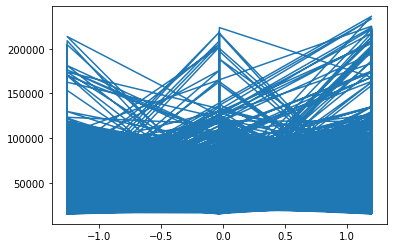

In [67]:
plt.plot(df_dummies['year'], df_dummies['price'])

In [68]:
shapiro_test = stats.shapiro(X_train)
shapiro_test

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9554108381271362, 0.0)